In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=false; 
function code_toggle() {
if (code_show){
$('div.input').hide();
} else {
$('div.input').show();
}
code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="This documment is written in a Jupyter notebook and the code used to produce these analyses has been hidden for ease of reading.  
To make the code visiable click here"></form>''')

In [2]:
import nmf_fxn
import numpy as np
import pandas as pd

## Read in example dataset

In [8]:
## example_data.csv contains normalized reads in log2 space. Only highly variable genes are included.
data = nmf_fxn.read_data("./example_data.csv")
## data is stored as a pandas dataframe, with genes as row index and cells as columns.

## we can check the dimemsion and the first few rows and columns of the dataframe:
print("data contains " + str(data.shape[0]) + " genes, and " + str(data.shape[1]) + " cells.")
data.iloc[:10,:10]

data contains 1860 genes, and 325 cells.


,oep_p1_S10,oep_p1_S11,oep_p1_S13,oep_p1_S14,oep_p1_S15,oep_p1_S17,oep_p1_S18,oep_p1_S19,oep_p1_S1,oep_p1_S20
SI:DKEY-153M14.1,9.720733,11.174465,9.577393,9.081636,9.863799,9.121863,10.954642,10.143173,9.714596,11.550823
FXYD6,5.028717,3.665686,4.326476,4.204167,5.528557,4.068033,4.730881,4.786369,4.144176,0.000000
ZGC:158463,10.626507,11.973802,10.387300,9.971859,10.857245,10.015664,11.823542,11.297423,10.275061,12.014666
SI:DKEYP-3B12.10,9.586111,10.566483,8.662327,8.057343,9.322839,8.426696,9.825539,9.957920,8.666562,10.491004
C1QB,5.704177,5.566036,5.482716,3.161429,4.660954,4.935812,5.003200,5.146802,5.075532,0.000000
SI:DKEY-108K21.12,4.484395,4.062837,4.558293,2.999519,4.933878,3.347658,2.645245,2.162770,5.293129,0.000000
SI:DKEY-16M19.4,4.102992,5.086262,4.327711,3.315853,4.901715,4.001715,5.163486,5.103424,5.570336,4.981173
ARL14,4.458897,3.069857,0.000000,2.392984,4.080400,1.706801,3.345533,3.645092,6.046266,0.000000
OTUD4,9.031972,10.138421,8.156974,7.837400,9.181496,7.371693,9.728482,8.890726,8.798459,10.284882
RAB34B,3.774034,3.466530,4.554078,2.039452,3.365717,3.409949,3.956914,3.103454,0.000000,0.000000


### nmf_fxn provides functions for scaling the dataset gene-wise according to their median or maximum values

In [11]:
data_med = nmf_fxn.med_scale(data,log_space=True)
data_max = nmf_fxn.max_scale(data,log_space=True)

## Run NMF with a single K (# modules)

### sklearn.decomposition.NMF function is called internally to perform each individual NMF. nmf_fxn then organizes the results into dictionaries.

In [13]:
## use time functions to measure how long it takes to run
from timeit import default_timer as timer
start_time = timer()

## run NMF on data with K=10 and repeat 5 times with random initial conditions:
NMF_K10 = nmf_fxn.run_nmf(data, n_groups=10, rep=5, verbose=True)
## there are other arguments for the function that control the initialization method, sparseness regulation, convergent criteria and so on.
## scaled data can be used instead.

end_time = timer()
print("Time spent: " + str(end_time-start_time) +"s")

Running rep0:
error: 751.281847102
n_iter: 24999
Running rep1:
error: 751.281847102
n_iter: 24999
Running rep2:
error: 751.281847104
n_iter: 24999
Running rep3:
error: 751.281847102
n_iter: 24999
Running rep4:
error: 751.281847107
n_iter: 24999
Time spent: 169.4579935419606s


### Examine the result:

In [23]:
## the results are stored in a dictionary, organized by repeats.
print("The result object is of type " + str(type(NMF_K10)))
print(NMF_K10.keys())

The result object is of type <class 'dict'>
dict_keys(['rep3', 'rep0', 'rep1', 'rep2', 'rep4'])


In [29]:
## each repeat is a dictionary itself, and contains the resulting factor matrices, as well as number of iterations took and reconstruction error
print(NMF_K10['rep0'].keys())

## The 'G' and 'C' matrices are conventionally called 'W' and 'H' matrices for NMF problems. 
## I renamed them as 'G' and 'C' because one gives information about Genes (genes' weights in modules), 
## the other gives information about Cells (modules' levels in cells).
## These two matrices are stored as pandas dataframes.
print("Matrix G (first 10 rows and columns):")
display(NMF_K10['rep0']['G'].iloc[:10,:10])

print("Matrix C (first 10 rows and columns):")
display(NMF_K10['rep0']['C'].iloc[:10,:10])

dict_keys(['C', 'G', 'n_iter', 'err'])
Matrix G (first 10 rows and columns):


,0,1,2,3,4,5,6,7,8,9
SI:DKEY-153M14.1,0.000000,0.000000,0.308275,0.122005,1.246802,1.726379,1.764213,0.000000,2.181838,1.004066
FXYD6,0.463079,0.358611,0.399095,0.443619,0.736271,0.662780,0.512903,0.279475,0.424298,0.144812
ZGC:158463,0.696409,0.000000,0.660092,0.691993,1.365635,1.781950,1.570028,0.156718,1.971906,0.951205
SI:DKEYP-3B12.10,0.000000,0.000000,0.000000,0.000000,0.699165,1.348227,1.416689,0.069944,2.431624,0.998542
C1QB,0.496555,0.643409,0.457554,0.517077,0.637405,0.938348,0.311505,0.306434,0.455930,0.080516
SI:DKEY-108K21.12,0.000000,0.000000,0.000000,0.066105,0.226283,0.753534,0.936197,0.040790,0.912350,0.362459
SI:DKEY-16M19.4,0.407103,0.000000,0.008641,0.507924,1.065510,0.878698,0.437995,0.000000,1.037148,0.155333
ARL14,0.672201,0.499971,0.240664,0.508133,0.697543,0.464160,0.086530,0.424640,0.351062,0.000000
OTUD4,0.502423,0.292412,0.619293,0.494896,0.896835,1.592503,1.150299,0.209488,1.403619,0.874897
RAB34B,0.000000,0.000000,0.304899,0.419567,0.491521,0.299936,0.845237,0.000000,0.568403,0.235858


Matrix C (first 10 rows and columns):


,oep_p1_S10,oep_p1_S11,oep_p1_S13,oep_p1_S14,oep_p1_S15,oep_p1_S17,oep_p1_S18,oep_p1_S19,oep_p1_S1,oep_p1_S20
0,0.000000,0.930590,0.000000,0.696881,0.477049,0.000000,0.000000,0.138444,0.228663,0.000000
1,0.191754,0.430147,0.000000,0.031700,0.184030,0.269370,0.164901,0.318902,0.000000,0.564308
2,0.494060,0.257279,0.148105,0.034222,0.304541,0.137483,0.617073,0.968341,0.000000,0.000000
3,2.012508,0.000000,2.225855,0.000000,0.024173,0.186607,1.922152,0.264143,0.000000,0.000000
4,0.786877,0.000000,0.710464,1.538563,0.524792,2.590908,0.294019,1.291578,0.000000,0.000000
5,1.335446,1.323745,1.992774,2.318065,2.764405,1.917483,1.749927,1.547155,5.088213,1.966909
6,2.133249,2.073706,2.315534,2.083126,1.543986,1.585892,1.580424,1.588709,0.167340,0.000000
7,0.848226,0.908537,1.035546,1.497606,0.529522,1.012209,0.531234,0.421951,1.335081,0.000000
8,0.673311,2.020303,0.265937,0.000000,0.883979,0.000000,1.649742,1.521731,0.000000,3.123890
9,0.579816,0.547412,0.000000,0.030628,0.717119,0.040282,0.050911,0.322970,0.000000,0.000000


### Identify top ranking genes in each gene module

In [46]:
top_K10_rep0 = nmf_fxn.print_top_genes(NMF_K10['rep0']['G'], n_top_genes=10, prt=False)
display(top_K10_rep0)

,Module 0,Weights 0,Module 1,Weights 1,Module 2,Weights 2,Module 3,Weights 3,Module 4,Weights 4,Module 5,Weights 5,Module 6,Weights 6,Module 7,Weights 7,Module 8,Weights 8,Module 9,Weights 9
0,ADMP,1.199913,LYRM1,2.149530,KRT18,1.638134,EVE1,2.425807,VED,1.570672,ZGC:158463,1.781950,SI:DKEYP-3B12.8,1.913808,BTG4,1.348572,SI:DKEYP-3B12.10,2.431624,SI:DKEY-153M14.1,1.004066
1,HSPB1,1.184676,ANO9A,2.078963,LYE,1.603500,TA,2.172727,APOEB,1.570457,SI:DKEY-153M14.1,1.726379,SI:DKEY-153M14.1,1.764213,CLDNG,1.328245,SI:DKEY-153M14.1,2.181838,SI:DKEYP-3B12.10,0.998542
2,SP5L,1.182163,AGRP,1.899907,MID1IP1A,1.570417,CDX4,1.886651,ALDOB,1.534925,STM,1.599415,ZGC:158463,1.570028,MID1IP1L,1.271857,ZGC:158463,1.971906,ZGC:158463,0.951205
3,STM,1.148549,HNRNPA0B,1.897837,KRT8,1.532597,WNT11,1.748340,EEF1A1L1,1.503549,OTUD4,1.592503,SI:DKEYP-3B12.10,1.416689,SI:DKEY-11O15.10,1.177692,SI:DKEYP-3B12.12,1.431323,OTUD4,0.874897
4,MALAT1,1.148433,ZGC:173587,1.852521,KRT4,1.531584,ZNF703,1.517175,SOX3,1.489573,HMGB2A,1.588520,SI:DKEY-261M9.17,1.349164,NANOS3,1.169124,ZGC:173552,1.417916,ZGC:173552,0.826583
5,EEF1A1L1,1.140778,ZGC:173552,1.745596,CLDNE,1.498460,VED,1.489696,BZW1A,1.466000,MARCKSL1B,1.574698,SI:CH1073-159D7.7,1.321045,ZGC:158852,1.157977,OTUD4,1.403619,SI:DKEYP-3B12.12,0.781510
6,SOX2,1.139735,SMC1A,1.745053,ZGC:101000,1.449417,MSX1B,1.476296,KHDRBS1A,1.455010,SI:DKEY-151G10.6,1.542904,HIST2H3C,1.172325,MAP1LC3C,1.133626,HIST1H2BA,1.359063,HNRNPA0L,0.781167
7,HMGB2A,1.109342,AGRP2,1.701988,KRT5,1.440353,ZNFL2A,1.418131,SI:CH211-195B11.4,1.450257,HSP90AB1,1.538968,OTUD4,1.150299,RPAIN,1.092841,HIST2H2AB,1.328215,CIRBPB,0.765810
8,CIRBPB,1.105050,HMGA1A,1.680888,KRT92,1.429425,TPBGA,1.375357,CIRBPB,1.448048,HNRNPABB,1.475054,ZGC:153405,1.140837,SKA2,1.055572,SI:CH211-195B11.4,1.311007,HIST2H2AB,0.752756
9,HNRNPA0L,1.088801,ZGC:110434,1.675510,CEBPB,1.408947,SP5L,1.339225,HSPB1,1.437783,HSPB1,1.463646,SI:CH211-113A14.15,1.124810,CLDND,1.055040,HMGA1A,1.290278,EEF1A1L1,0.751596


A lot of genes with known spatial patterns or functions are among these top ranking genes. For example, Module2 is enriched with EVL genes; Module3 is enriched with marginal/ventral genes, and Module7 is enriched with maternal factors and germline markers.

In [47]:
## we can look at a different repeat of this NMF run:
top_K10_rep4 = nmf_fxn.print_top_genes(NMF_K10['rep4']['G'], n_top_genes=10, prt=False)
display(top_K10_rep4)

,Module 0,Weights 0,Module 1,Weights 1,Module 2,Weights 2,Module 3,Weights 3,Module 4,Weights 4,Module 5,Weights 5,Module 6,Weights 6,Module 7,Weights 7,Module 8,Weights 8,Module 9,Weights 9
0,ADMP,1.199913,LYRM1,2.149530,KRT18,1.638134,EVE1,2.425807,VED,1.570672,ZGC:158463,1.781950,SI:DKEYP-3B12.8,1.913808,BTG4,1.348572,SI:DKEYP-3B12.10,2.431624,SI:DKEY-153M14.1,1.004066
1,HSPB1,1.184677,ANO9A,2.078964,LYE,1.603500,TA,2.172727,APOEB,1.570457,SI:DKEY-153M14.1,1.726379,SI:DKEY-153M14.1,1.764213,CLDNG,1.328245,SI:DKEY-153M14.1,2.181839,SI:DKEYP-3B12.10,0.998542
2,SP5L,1.182163,AGRP,1.899907,MID1IP1A,1.570417,CDX4,1.886651,ALDOB,1.534925,STM,1.599415,ZGC:158463,1.570028,MID1IP1L,1.271857,ZGC:158463,1.971906,ZGC:158463,0.951205
3,STM,1.148550,HNRNPA0B,1.897837,KRT8,1.532597,WNT11,1.748340,EEF1A1L1,1.503549,OTUD4,1.592503,SI:DKEYP-3B12.10,1.416688,SI:DKEY-11O15.10,1.177692,SI:DKEYP-3B12.12,1.431324,OTUD4,0.874897
4,MALAT1,1.148433,ZGC:173587,1.852521,KRT4,1.531584,ZNF703,1.517175,SOX3,1.489573,HMGB2A,1.588520,SI:DKEY-261M9.17,1.349163,NANOS3,1.169124,ZGC:173552,1.417916,ZGC:173552,0.826583
5,EEF1A1L1,1.140778,ZGC:173552,1.745596,CLDNE,1.498460,VED,1.489696,BZW1A,1.466000,MARCKSL1B,1.574698,SI:CH1073-159D7.7,1.321045,ZGC:158852,1.157977,OTUD4,1.403619,SI:DKEYP-3B12.12,0.781510
6,SOX2,1.139736,SMC1A,1.745053,ZGC:101000,1.449417,MSX1B,1.476296,KHDRBS1A,1.455010,SI:DKEY-151G10.6,1.542903,HIST2H3C,1.172325,MAP1LC3C,1.133626,HIST1H2BA,1.359063,HNRNPA0L,0.781167
7,HMGB2A,1.109342,AGRP2,1.701988,KRT5,1.440353,ZNFL2A,1.418132,SI:CH211-195B11.4,1.450257,HSP90AB1,1.538968,OTUD4,1.150299,RPAIN,1.092841,HIST2H2AB,1.328215,CIRBPB,0.765810
8,CIRBPB,1.105051,HMGA1A,1.680888,KRT92,1.429425,TPBGA,1.375357,CIRBPB,1.448048,HNRNPABB,1.475054,ZGC:153405,1.140837,SKA2,1.055572,SI:CH211-195B11.4,1.311006,HIST2H2AB,0.752756
9,HNRNPA0L,1.088801,ZGC:110434,1.675510,CEBPB,1.408947,SP5L,1.339225,HSPB1,1.437783,HSPB1,1.463646,SI:CH211-113A14.15,1.124810,CLDND,1.055040,HMGA1A,1.290277,EEF1A1L1,0.751596


Results from these two repeated runs are almost identical, indicating a high consistency of the results with the set of parameters used. But reconstruction error might be too high.

### Visualizing reconstruction errors

<IPython.core.display.Javascript object>


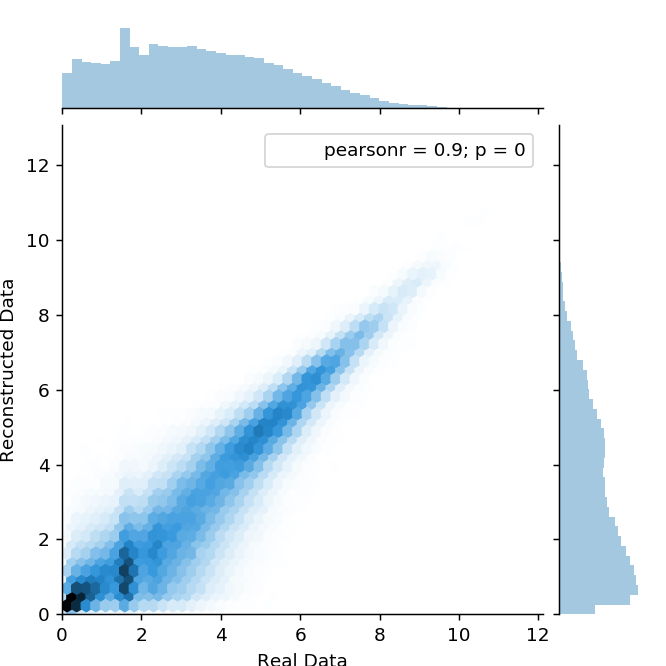

In [66]:
%matplotlib notebook
nmf_fxn.rebuild_hex(NMF_K10['rep0']['G'],NMF_K10['rep0']['C'],data,min_val=0.0001,fg_sz=5)

## Run NMF for multiple K values and decide which K to use 

### Instead of calling run_nmf() multiple times, we'll build a nmf_reps class, within which the run_nmf() function will be called for each K and all the parameters and results will be stored together.

### Setting up nmf_reps class 

In [67]:
## initiate the class
NMF_allK=nmf_fxn.nmf_reps()

## set parameters
ks=[8, 10, 12, 14, 16, 18, 20] # Number of modules
NMF_allK.set_param(scale=None, Ks=ks, rep=5, verbose=True, permute=True) #permute=True : generate a randomly permuted dataset as a control

## set data
NMF_allK.set_data(data) # if scale is not None in set_param, data will be automatically scaled accordingly at this step

Removing 2 all-zero rows and 0 all-zero columns...
Permuting expression data...


In [73]:
## The parameters are stored in NMF_allK.Params:
print("NMF_allK.Params:")
print(NMF_allK.Params)

## The datasets are stored in NMF_allK.data:
print("\nKeys in NMF_allK.data:")
print(NMF_allK.data.keys())

NMF_allK.Params:
{'max_iter': 25000, 'rep': 5, 'permute': True, 'tol': 1e-07, 'alpha': 0.25, 'Ks': [8, 10, 12, 14, 16, 18, 20], 'l1': 0.5, 'init': None, 'sub': None, 'scale': None, 'verbose': True, 'rand_state': None}

Keys in NMF_allK.data:
dict_keys(['raw', 'permuted', 'scaled'])


### Run NMF using the class

In [74]:
start_time = timer()
## run NMF with the parameters and data just set
NMF_allK.nmf_results(permuted=True, prt_top_genes=False) 
## permuted=True : run NMF on the permuted dataset as well
## prt_top_genes : whether to print the top 30 genes and their weights in each module. 
##     Can be True, False, or a path to save the table as a .csv file. 
##     Only the result of the first run for each K ('rep0') will be printed/saved. Top genes will be printed/saved as NMF for each K is finished.
##     The benefit of using prt_top_genes is that if you have a long list of Ks to run, you don't need to wait until all the Ks are finished to take a peak at the result.
end_time = timer()
print("Time spent: " + str(end_time-start_time) +"s")

Running NMF for K=8...
Running rep0:
error: 759.941773427
n_iter: 19848
Running rep1:
error: 759.941773427
n_iter: 19847
Running rep2:
error: 759.941773427
n_iter: 19848
Running rep3:
error: 759.941773427
n_iter: 19848
Running rep4:
error: 759.941773427
n_iter: 19848
  running permuted dataset...
Running rep0:
error: 879.647456336
n_iter: 24999
Running rep1:
error: 879.647456319
n_iter: 24999
Running rep2:
error: 879.6474562
n_iter: 24999
Running rep3:
error: 879.647456298
n_iter: 24999
Running rep4:
error: 879.647456348
n_iter: 24999
Running NMF for K=10...
Running rep0:
error: 751.281847102
n_iter: 24999
Running rep1:
error: 751.281847103
n_iter: 24999
Running rep2:
error: 751.281847104
n_iter: 24999
Running rep3:
error: 751.281847102
n_iter: 24999
Running rep4:
error: 751.281847101
n_iter: 24999
  running permuted dataset...
Running rep0:
error: 873.787651374
n_iter: 24999
Running rep1:
error: 873.796755417
n_iter: 24999
Running rep2:
error: 873.787649629
n_iter: 24999
Running rep3:

### Check the results stored in the class: NMF_allK.results

In [77]:
## the results are stored in NMF_allK.results: 
print(type(NMF_allK.results))

## NMF_allK.results is a dictionary organized by K:
print("\nKeys in NMF_allK.results:")
print(NMF_allK.results.keys())

## Each key is a dictionary itself, organized by repeats (same as the result produced by the run_nmf() function before)
print("\nKeys in NMF_allK.results['K=10']")
print(NMF_allK.results["K=10"].keys())

<class 'dict'>

Keys in NMF_allK.results:
dict_keys(['K=20', 'K=12', 'K=8', 'K=16', 'K=14', 'K=10', 'K=18'])

Keys in NMF_allK.results['K=10']
dict_keys(['rep3', 'rep0', 'rep1', 'rep2', 'rep4'])


### Calculate the stability of the results for each K

In [79]:
NMF_allK.calc_stability(stats=["inconsistency_G","inconsistency_C","cophenetic_C","cophenetic_G"],permuted=True)
## can change stats to include a subset of the four metrics.
## if permuted=True, same metrics will be calculated for the results from permuted dataset.

Calculating stability for results...
Calculating stats on matrices G for K=8...
building connectivity matrix for rep3...
building connectivity matrix for rep0...
building connectivity matrix for rep1...
building connectivity matrix for rep2...
building connectivity matrix for rep4...
Calculating stats on matrices G for K=10...
building connectivity matrix for rep3...
building connectivity matrix for rep0...
building connectivity matrix for rep1...
building connectivity matrix for rep2...
building connectivity matrix for rep4...
Calculating stats on matrices G for K=12...
building connectivity matrix for rep3...
building connectivity matrix for rep0...
building connectivity matrix for rep1...
building connectivity matrix for rep2...
building connectivity matrix for rep4...
Calculating stats on matrices G for K=14...
building connectivity matrix for rep3...
building connectivity matrix for rep0...
building connectivity matrix for rep1...
building connectivity matrix for rep2...
building 

In [82]:
## stability results are stored in .stability and .permuted_stability as pandas dataframe. Column names are Ks.
display(NMF_allK.stability)
display(NMF_allK.permuted_stability)

,8,10,12,14,16,18,20
inconsistency_G,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040740
inconsistency_C,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034606
cophenetic_C,0.959647,0.936551,0.914053,0.904853,0.893558,0.851808,0.757852
cophenetic_G,0.971062,0.963908,0.930023,0.925256,0.776831,0.795247,0.655780


,8,10,12,14,16,18,20
inconsistency_G,0.000000,0.079541,0.062945,0.047197,0.133205,0.145137,0.152614
inconsistency_C,0.000000,0.025611,0.039578,0.025193,0.081907,0.090838,0.099537
cophenetic_C,0.922011,0.890667,0.835197,0.850972,0.767523,0.611424,0.609922
cophenetic_G,0.968474,0.939012,0.911483,0.924546,0.729918,0.560299,0.463981


<IPython.core.display.Javascript object>


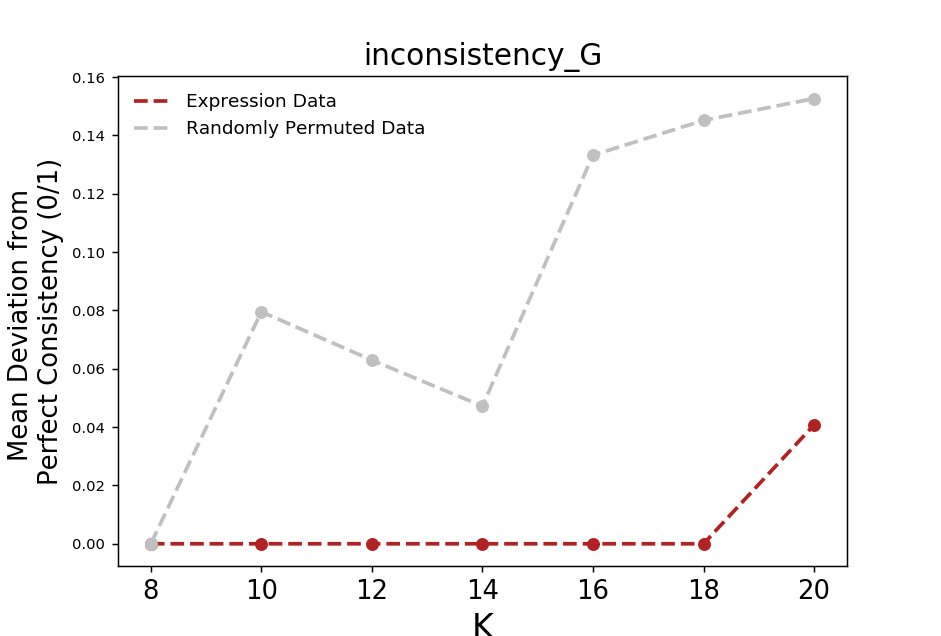

<IPython.core.display.Javascript object>


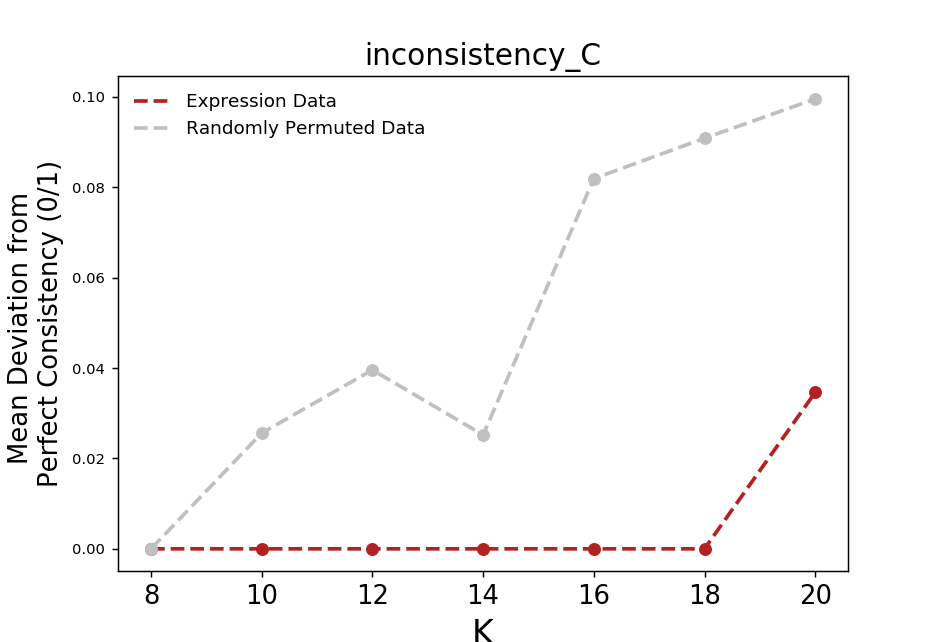

<IPython.core.display.Javascript object>


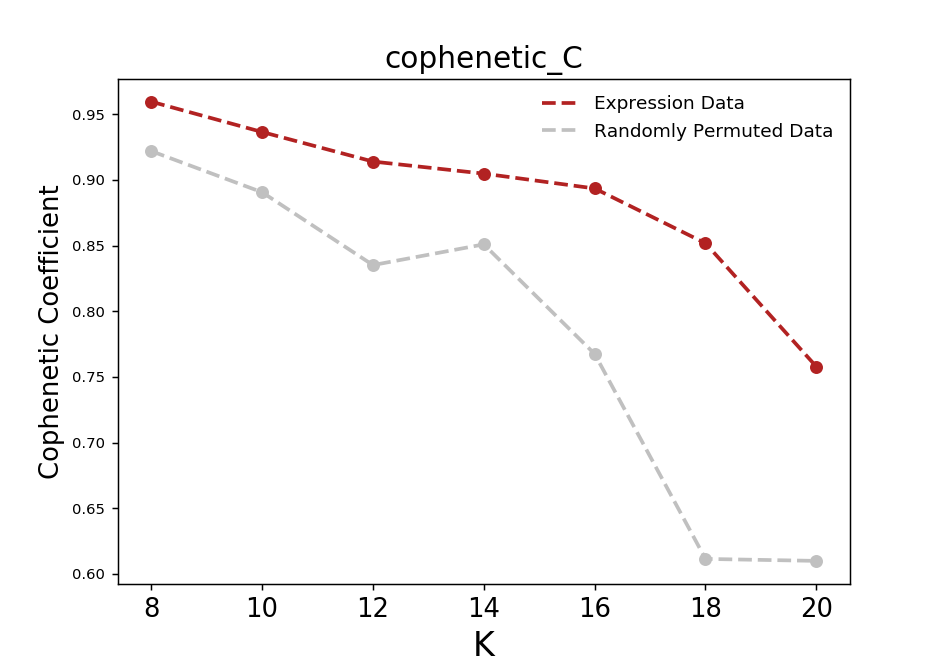

<IPython.core.display.Javascript object>


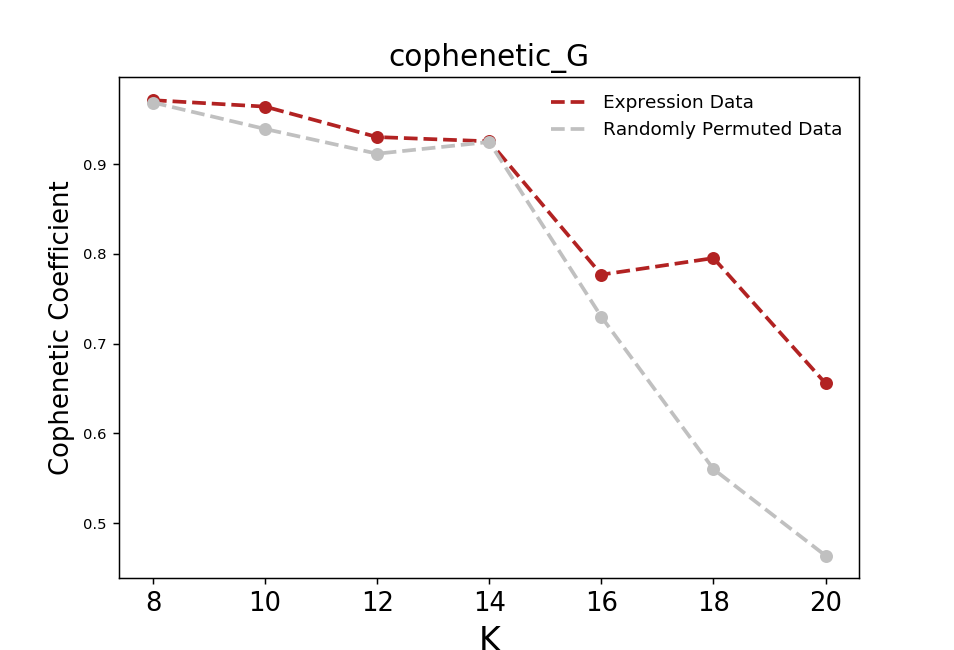

In [91]:
## Plot the stability results
NMF_allK.plot_stability(stats=["inconsistency_G","inconsistency_C","cophenetic_C","cophenetic_G"],fg_sz=[7,4.5])

In general, we want low inconsistency and high cophenetic index.

<IPython.core.display.Javascript object>


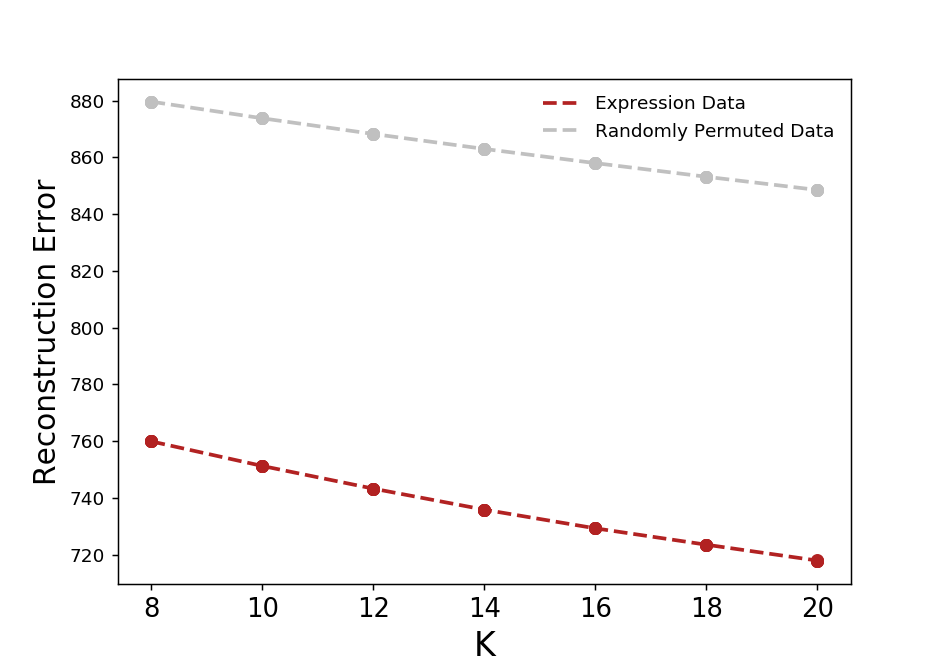

<IPython.core.display.Javascript object>


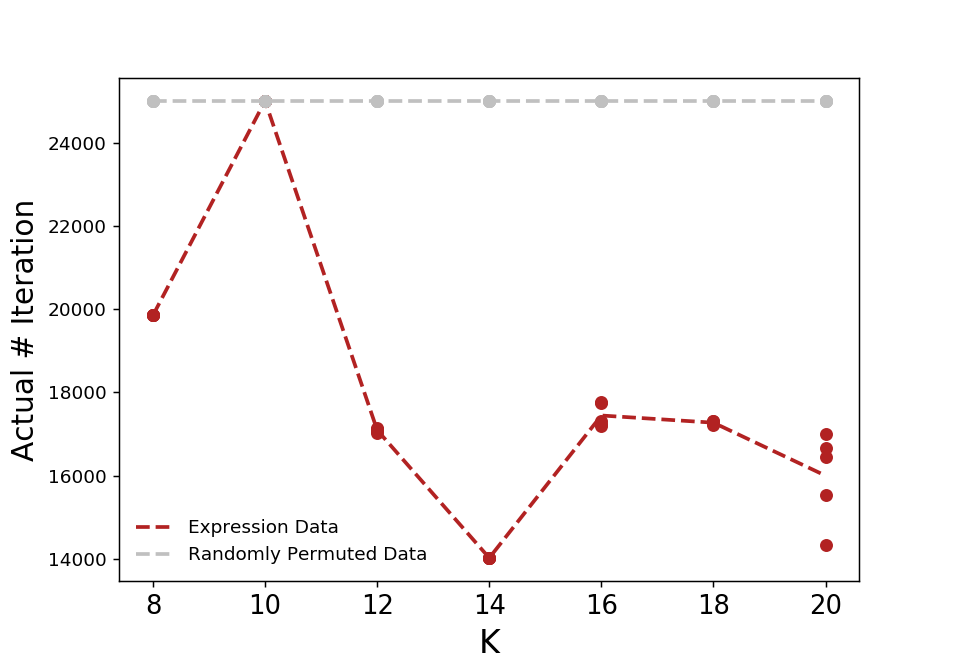

In [92]:
## Plot the number of actual iteration and reconstruction errors
NMF_allK.plot_err(stat="err",measure="mean")
NMF_allK.plot_err(stat="n_iter",measure="mean")

Small reconstruction error generally means the results are more reflective of the actual input data. But as K goes up or if sparseness regularization parameters are set too small, low reconstruction error could also be a result of overfitting the noise in the data.

By checking the actual number of iteration, we can make sure that the results we want to use converged before reaching the max_iter allowed (in this case it's set to 25000). In this example, since results for K=10 never converged before reaching the maximun number of iteration allowed, we wouldn't use the results from it. If the actual number of iteration is almost always exactly max_iter, we should increase the max_iter parameter, or adjust the regularization parameters or the initialization method.

### Visualizing reconstruction errors for different Ks 

This helps us to make sure the factorized matrices still recapitulate the actual data.

<IPython.core.display.Javascript object>


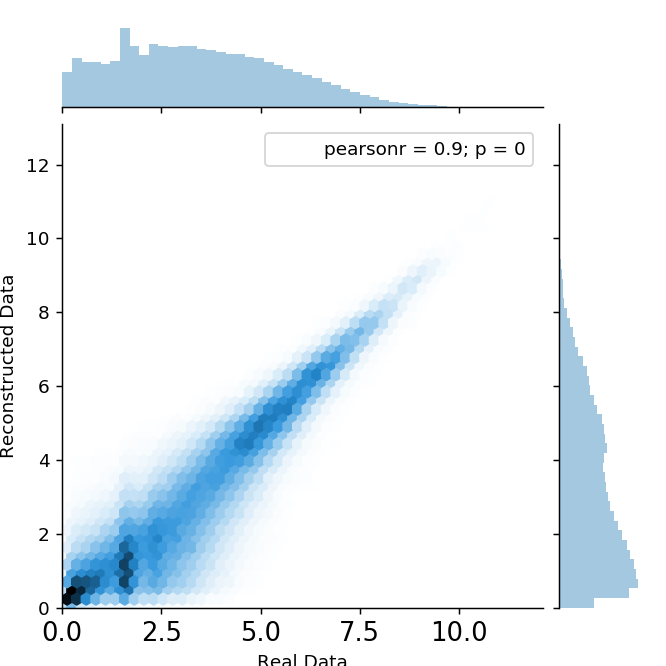

In [111]:
## For K=18
rebuild_hex(NMF_allK.results['K=18']['rep0']['G'],NMF_allK.results['K=18']['rep0']['C'],NMF_allK.data['raw'],min_val=0.0001,fg_sz=5)

<IPython.core.display.Javascript object>


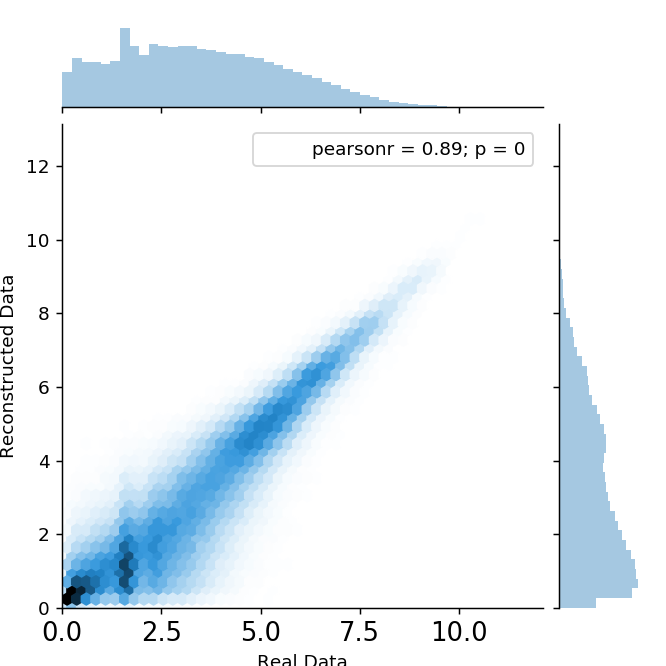

In [112]:
## For K=8
rebuild_hex(NMF_allK.results['K=8']['rep0']['G'],NMF_allK.results['K=8']['rep0']['C'],NMF_allK.data['raw'],min_val=0.0001,fg_sz=5)

<IPython.core.display.Javascript object>


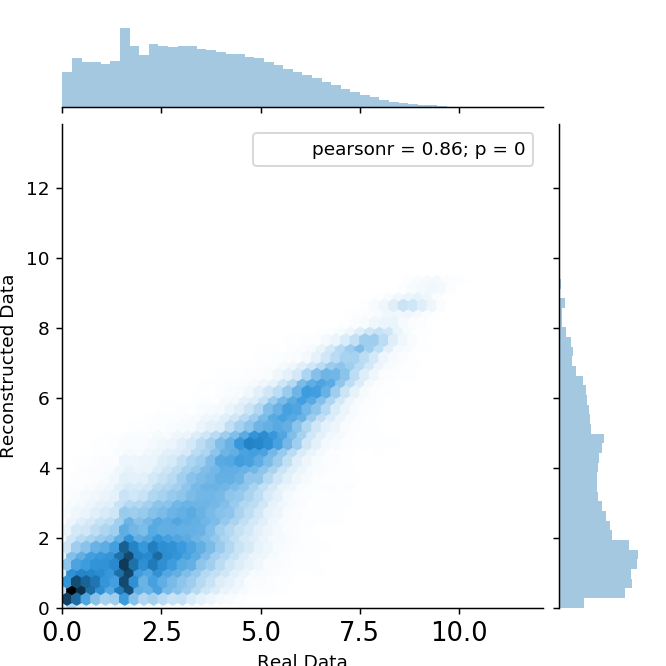

In [113]:
## For permuted dataset with K=8
nmf_fxn.rebuild_hex(NMF_allK.permuted_results['K=8']['rep0']['G'],NMF_allK.permuted_results['K=8']['rep0']['C'],NMF_allK.data['permuted'],min_val=0.0001,fg_sz=5)

As expected, results for the permuted dataset don't recapitulate the input dataset as well as the results for the real data. That's because the permuted dataset is less structured, and also from the actual # iteration plot, we can see that results for the permuted dataset didn't converge. 

### Based on these analysis, it seem that K=18 produces pretty stable results, so we'll choose results from K=18 for further analysis

The stability scores and reconstruction errors are calculated to help us decide which K to use. There may not always be a clear answer by looking at these metrics. Checking the highly ranked gene in each module and use known biology to evaluate the quality of the results can also be helpful. 

In [118]:
top_K18_rep0 = nmf_fxn.print_top_genes(NMF_allK.results['K=18']['rep0']['G'], n_top_genes=10, prt=False)
pd.set_option('display.max_columns', 100)
display(top_K18_rep0)

,Module 0,Weights 0,Module 1,Weights 1,Module 2,Weights 2,Module 3,Weights 3,Module 4,Weights 4,Module 5,Weights 5,Module 6,Weights 6,Module 7,Weights 7,Module 8,Weights 8,Module 9,Weights 9,Module 10,Weights 10,Module 11,Weights 11,Module 12,Weights 12,Module 13,Weights 13,Module 14,Weights 14,Module 15,Weights 15,Module 16,Weights 16,Module 17,Weights 17
0,BZW1A,1.471278,LYRM1,2.180371,MID1IP1A,1.604920,EVE1,2.755827,SI:DKEY-153M14.1,1.269951,ZGC:158463,1.195785,SI:DKEYP-3B12.10,2.321287,ADMP,1.391715,SI:DKEYP-3B12.10,1.447991,ZGC:158463,0.796890,SI:DKEY-261M9.17,1.349039,ZGC:158463,0.948017,MDM2,1.055470,GBP3,0.749047,NANOS3,1.372766,ZGC:158463,1.247115,SI:DKEYP-3B12.8,5.005111,APOC1,1.893876
1,GDF3,1.292934,HNRNPA0B,1.921199,KRT8,1.591585,TA,2.451356,ZGC:158463,1.250414,EPCAM,1.167473,ZGC:158463,1.599725,FOXD3,1.383527,ZGC:158463,1.355514,SI:DKEY-153M14.1,0.773215,HIST2H3C,1.140764,SI:DKEY-153M14.1,0.894521,PHLDA3,1.047761,METAZOA_SRP,0.726966,SI:DKEY-11O15.10,1.212285,SI:DKEY-153M14.1,1.178502,SI:DKEY-153M14.1,1.373790,VED,1.746493
2,SI:DKEY-153M14.1,1.275473,ANO9A,1.913598,KRT18,1.589894,CDX4,2.117752,KHDRBS1A,1.221376,SI:DKEY-153M14.1,1.159343,SI:DKEY-153M14.1,1.572777,SP5L,1.361001,SI:DKEY-153M14.1,1.309533,SI:DKEYP-3B12.10,0.726928,ZGC:153405,0.998844,ZGC:173552,0.823298,SI:CH211-260E23.9,0.936866,LAMC1,0.721346,CLDNG,1.149801,SI:DKEY-151G10.6,1.125813,ZGC:158463,1.229553,SI:CH211-139K8.4,1.638117
3,MKRN4,1.266363,AGRP,1.912527,LYE,1.560906,WNT11,2.002648,HNRNPA0L,1.199106,MALAT1,1.156891,OTUD4,1.376279,SOX2,1.220442,EEF1A1L1,1.131806,ZGC:173552,0.691930,SI:DKEY-23A13.15,0.942782,SI:DKEYP-3B12.10,0.814722,APLNRB,0.823090,CPE,0.707289,CA15B,1.097926,HSPB1,1.109789,OTUD4,0.981024,SI:DKEY-188C14.4,1.626949
4,ZGC:158463,1.229142,ZGC:173587,1.875577,KRT4,1.541885,ZNF703,1.734101,CIRBPB,1.191419,SI:CH211-242H13.4,1.154420,SI:DKEYP-3B12.12,1.288781,ZIC3,1.166331,HNRNPA0L,1.125791,HNRNPA0L,0.678408,ZGC:113886,0.939973,OTUD4,0.807722,TP53INP1,0.772272,SI:DKEY-186O21.1,0.697546,HSP90AA1.2,1.073427,HMGB2A,1.083624,SI:DKEYP-3B12.13,0.920164,SZL,1.501025
5,CIRBPB,1.221167,ZGC:173552,1.858178,CLDNE,1.540935,VED,1.727378,EEF1A1L1,1.177930,KHDRBS1A,1.144428,ZGC:110434,1.279777,CHD,1.161138,CIRBPB,1.117331,OTUD4,0.666184,P4HB,0.939715,HIST1H2BA,0.805309,ZGC:64022,0.765170,KCNK4,0.690065,BTG4,1.068872,HSP90AB1,1.075996,ZGC:173552,0.910773,SI:CH1073-80I24.3,1.412181
6,P4HB,1.196140,CABZ01084942.1,1.787935,KRT92,1.481693,APOC1,1.688779,SI:CH211-195B11.4,1.175772,HNRNPABB,1.142366,ZGC:173552,1.274470,SI:DKEY-188C14.4,1.155021,SI:CH211-195B11.4,1.098053,EEF1A1L1,0.655933,ZGC:158463,0.924665,HIST2H2AB,0.761479,BCL2L14,0.748504,ZGC:174574,0.656273,TDRD7A,1.038972,OTUD4,1.065843,HNRNPA0L,0.899209,SFRP1A,1.370571
7,HNRNPA0L,1.193785,HNRNPA0L,1.772738,KRT5,1.452593,MSX1B,1.611224,ZGC:113886,1.157322,HNRNPA0L,1.140548,SI:DKEY-108K21.26,1.257260,SI:CH211-139K8.4,1.122418,KHDRBS1A,1.072407,CIRBPB,0.646888,SI:CH211-113A14.10,0.912222,STM,0.732770,CTSH,0.738844,PRCC,0.635002,RPAIN,0.988092,STM,1.062186,HSPB1,0.895239,BMP7A,1.298993
8,EEF1A1L1,1.183645,ZGC:110434,1.764639,ZGC:101000,1.427525,SP5L,1.485071,HMGA1A,1.153237,ZGC:113886,1.117504,HIST1H2BA,1.234665,ADD3B,1.042875,ZGC:173552,1.072083,ALDOB,0.629058,SI:DKEY-153M14.1,0.891502,HSP90AB1,0.693398,FOXO3B,0.729766,TPM4B,0.631222,SI:RP71-45K5.2,0.985428,RPL39,1.043247,EEF1A1L1,0.868357,BAMBIA,1.276234
9,KHDRBS1A,1.181921,SMC1A,1.756973,KRT97,1.419060,AXIN2,1.460287,DDX5,1.141570,HMGB2A,1.103964,HIST2H2AB,1.222088,FOXD5,0.964047,HMGA1A,1.065816,UQCRH,0.628892,BZW1A,0.880184,HMGA1A,0.691864,SESN3,0.725848,PKDCCB,0.620314,DND1,0.932577,RPS17,1.041004,SI:DKEYP-3B12.15,0.851194,KAZALD2,1.274618


Compared to the modules previously found with K=10, here with K=18 we see more recognizable structures in gene module organization. For example, Module2 is enriched with EVL genes, Module3 is enriched with marginal/ventral (mesoderm) genes, Module7 is characteristic of dorsally expressed (neural ectoderm) genes, Module12 contains genes that mark an apoptotic-like cell states, Module14 seems like a germline module, and Module17 is loaded with genes expressed in the ventral animal region (non-neural ectoderm) of the embryo.

Sometimes there are modules primarily reflects the variability of a single gene rather than a group of genes. For example, the top ranking gene in Module16 has a weight of 5, which is almost 4 times the weight of the gene second in rank. I tend to think that such modules are not supported by robust substructures in the data and would remove them from subsequent analysis

### Visualize Matrix C (modules' levels in cells) as a heatmap 

<IPython.core.display.Javascript object>


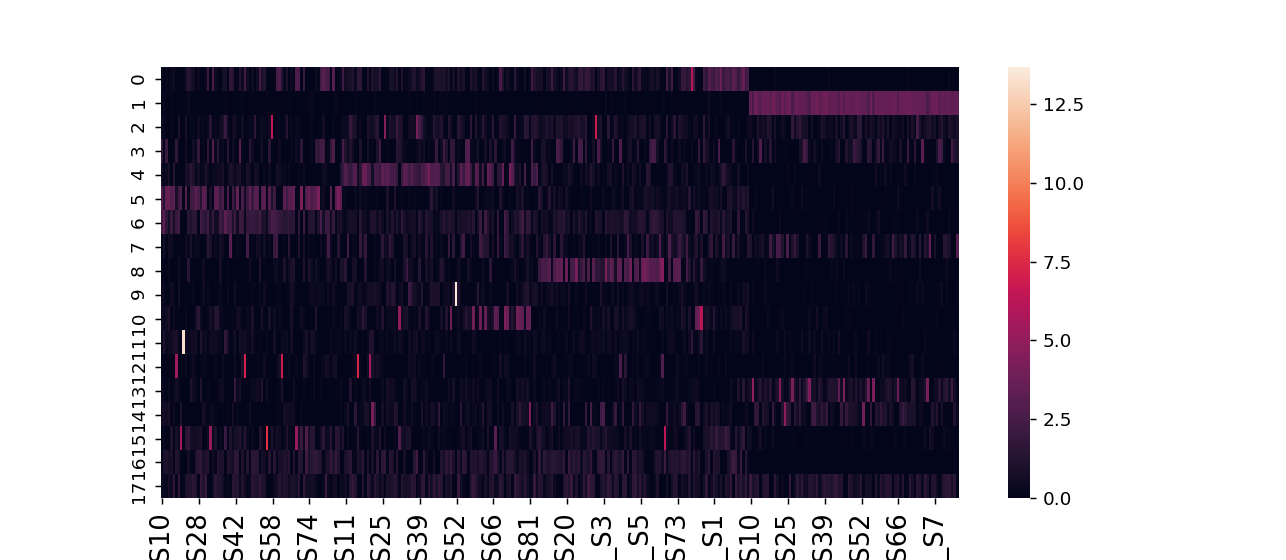

In [119]:
import seaborn as sns
sns.heatmap(NMF_allK.results['K=18']['rep0']['C'])

It's not very meaningful to compare the vlaues in matrix C across different rows, similarly, it's not meaningful to compare the values in matrix G across different columns. So I scale matrix C by rows and G by columns for many analysis.

<IPython.core.display.Javascript object>


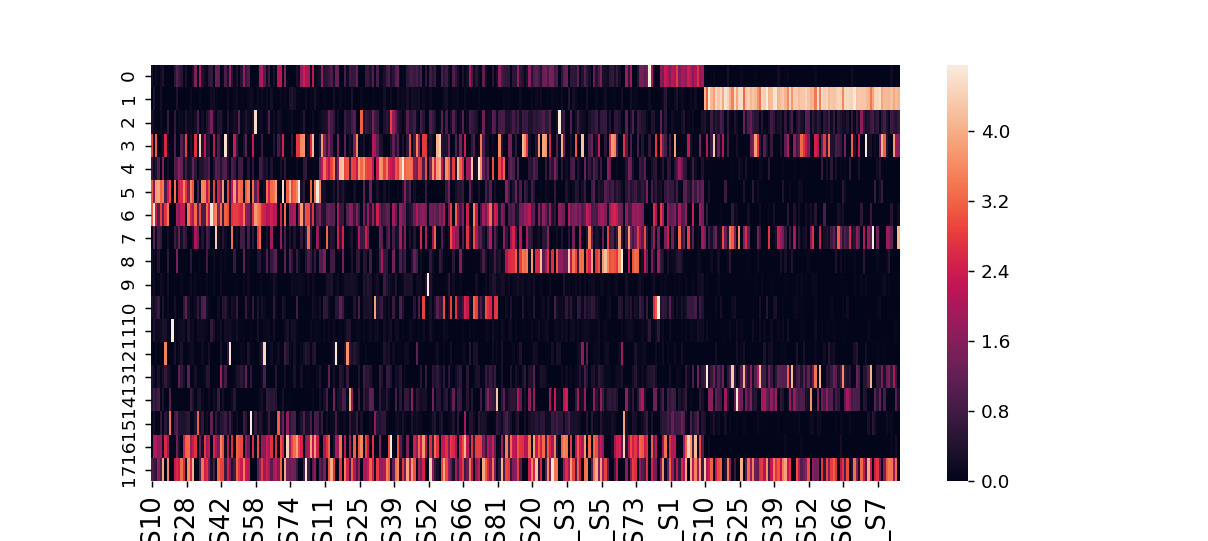

In [122]:
sns.heatmap(nmf_fxn.max_scale(NMF_allK.results['K=18']['rep0']['C'],log_space=False))
## the max_scale() and med_scale functions currently can only scale dataset by rows.
## to scale the G matrix, you can write your own functions, or do something like this:
## G_scl=nmf_fxn.max_scale(G.T); G_scl=G_scl.T

The data in the example dataset contains transcriptomes prepared as two batches. From the heatmap, Module0, Module1, Module6, and Module16 are strong markers for the two batches. There are more sophisticated ways to test for which modules are strongly predictive of batches. Batch modules should be removed before further analysis such as clustering analysis.

## Conclusions 

In this example notebook, key functions in nmf_fxn.py and their usages are demonstrated. However, running NMF for large datasets over many K values with multiple repeats can be very slow. So, it's preferential to run NMF on a cluster, or to run it for individual K and small number of repeat at a time then later integrate all the results together for analysis. These are possible with the scripts provided in the Scripts folder. 